In [1]:
# graphical etl (getl) proof of concept

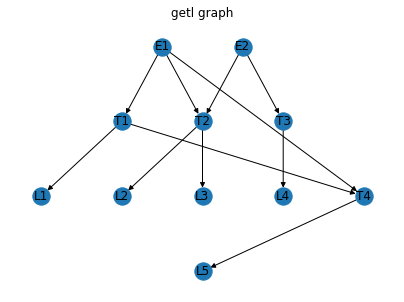

In [2]:
import getl
import networkx

getl.scan_for_plugins('src.etl01_skeleton')

gg: networkx.DiGraph = getl.build()
rg, run_order = getl.create_linear_run(gg)
getl.draw_etl_process(gg, 'getl graph')

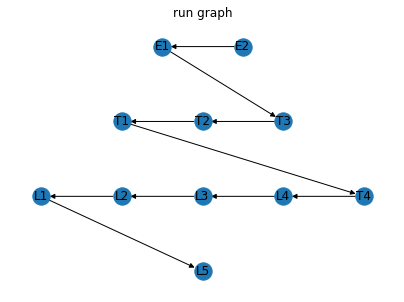

executing extract02...
executing extract01...
executing transform03...
executing transform02...
executing transform01...
executing transform04...
executing load4...
executing load3...
executing load2...
executing load1...
executing load5...


In [3]:
# running the whole process
getl.draw_etl_process(rg, 'run graph')
for np in run_order:
    rg.nodes[np]['np_func']()

## Partial ETL from Starting Node

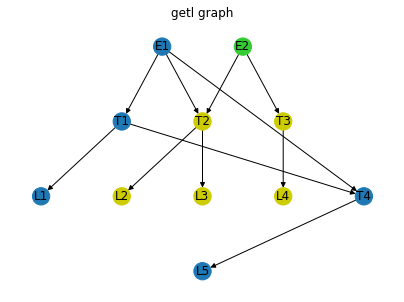

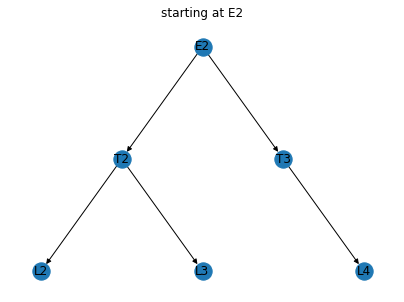

In [4]:
subset_extract02 = getl.get_process_starting_at(gg, 'E2')
rg2, run_order2 = getl.create_linear_run(subset_extract02)

color2 = ['#33cc33' if node == 'E2' else '#cccc00' if node in subset_extract02 else '#1f78b4' for node in gg]
getl.draw_etl_process(gg, 'getl graph', node_color=color2)
getl.draw_etl_process(subset_extract02, 'starting at E2')

## Partial ETL from Ending Node

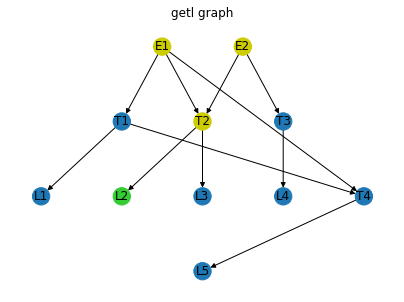

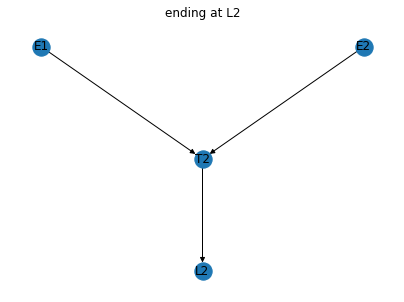

In [5]:
subset_load2 = getl.get_process_ending_at(gg, 'L2')
rg3, run_order3 = getl.create_linear_run(subset_load2)

color3 = ['#33cc33' if node == 'L2' else '#cccc00' if node in subset_load2 else '#1f78b4' for node in gg]
getl.draw_etl_process(gg, 'getl graph', node_color=color3)
getl.draw_etl_process(subset_load2, 'ending at L2')

## Partial ETL Between Nodes

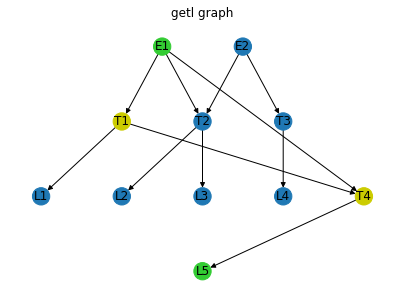

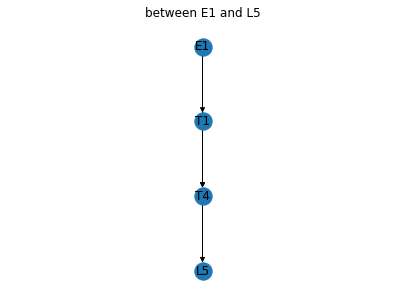

In [6]:
subset_load3 = getl.get_process_between(gg, 'E1', 'L5')
rg4, run_order4 = getl.create_linear_run(subset_load3)

color4 = ['#33cc33' if node == 'E1' or node == 'L5' else '#cccc00' if node in subset_load3 else '#1f78b4' for node in gg]
getl.draw_etl_process(gg, 'getl graph', node_color=color4)
getl.draw_etl_process(subset_load3, 'between E1 and L5')

## Partial ETL Between Nodes

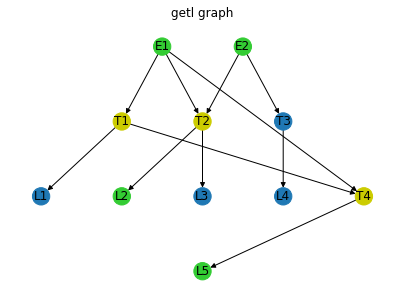

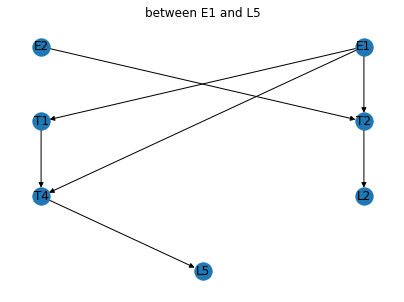

In [8]:
subset_load4 = getl.get_processes_between(gg, start_nodes=['E1', 'E2'], end_nodes=['L2', 'L5'])
# rg5, run_order5 = getl.create_linear_run(subset_load3)

color5 = ['#33cc33' if node in ['E1', 'E2', 'L2', 'L5'] \
            else '#cccc00' if node in subset_load4 \
            else '#1f78b4' for node in gg]
getl.draw_etl_process(gg, 'getl graph', node_color=color5)
getl.draw_etl_process(subset_load4, 'between E1 and L5')